# This workbook will show comparisons for each team against the other 11 teams in different categories


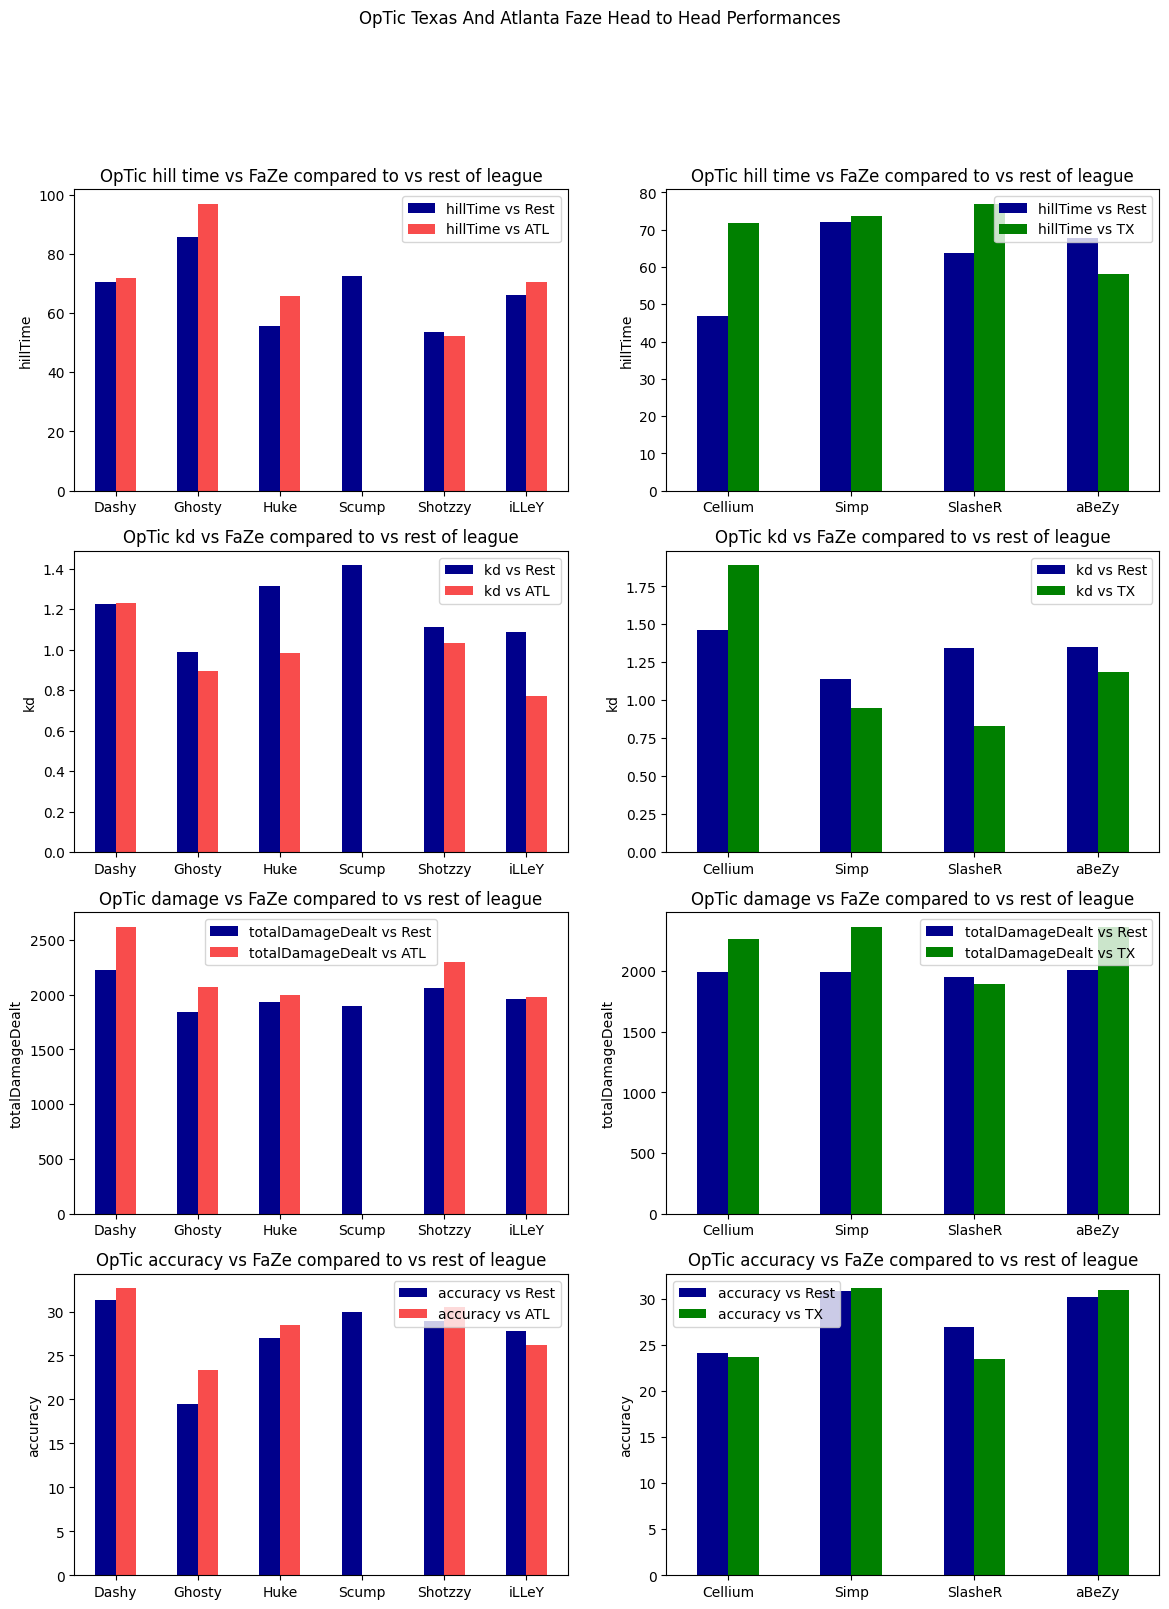

In [41]:
from cdl_helper import CDL_PALETTE, read_in_all_matches

import pandas as pd
import matplotlib.pyplot as plt

df = read_in_all_matches()

df['accuracy'] = ((df['totalShotsHit']/df['totalShotsFired'])*100).round(2)
df['kd'] = (df['totalKills']/df['totalDeaths']).round(2)


def head_to_head(df, main, opposition, compare, title, axes, gamemode=None, map=None):
    if gamemode:
        df = df[df['gameMode'].isin([gamemode] if type(gamemode) == str else [*gamemode])]

    if map:
        df = df[df['gameMap'].isin([map] if type(map) == str else [*map])]

    df = df[df['abbrev']==main]
    df_opp = df.copy()[df['oppo_abbrev']==opposition]
    df_rest = df.copy()[df['oppo_abbrev']!=opposition]
    df_opp = df_opp[['alias', compare, 'oppo_abbrev', 'abbrev']]
    df_rest = df_rest[['alias', compare, 'oppo_abbrev', 'abbrev']]
    op_stats = df_opp.groupby('alias').mean().reset_index().rename(columns={compare:  f'{compare} vs {opposition}'})
    rest_stats = df_rest.groupby('alias').mean().reset_index().rename(columns={compare:  f'{compare} vs Rest'})
    joined = rest_stats.merge(op_stats, how='left', on='alias')
    joined.set_index('alias', inplace=True)
    joined.plot(kind='bar', color=['darkblue', CDL_PALETTE[opposition]], ax=axes)
    axes.set_ylabel(compare)
    axes.set_title(title)
    axes.tick_params(rotation=0)
    axes.set_xlabel('')


fig = plt.figure(figsize=(14, 18))
((ax1, ax2),
 (ax3, ax4),
 (ax5, ax6),
 (ax7, ax8)) = fig.subplots(ncols=2, nrows=4)

head_to_head(df, 'TX', 'ATL', 'hillTime', "OpTic hill time vs FaZe compared to vs rest of league", ax1)
head_to_head(df, 'ATL', 'TX', 'hillTime', "OpTic hill time vs FaZe compared to vs rest of league", ax2)
head_to_head(df, 'TX', 'ATL', 'kd', "OpTic kd vs FaZe compared to vs rest of league",ax3)
head_to_head(df, 'ATL', 'TX', 'kd', "OpTic kd vs FaZe compared to vs rest of league",ax4)
head_to_head(df, 'TX', 'ATL', 'totalDamageDealt', "OpTic damage vs FaZe compared to vs rest of league",ax5)
head_to_head(df, 'ATL', 'TX', 'totalDamageDealt', "OpTic damage vs FaZe compared to vs rest of league",ax6)
head_to_head(df, 'TX', 'ATL', 'accuracy', "OpTic accuracy vs FaZe compared to vs rest of league",ax7)
head_to_head(df, 'ATL', 'TX', 'accuracy', "OpTic accuracy vs FaZe compared to vs rest of league",ax8)

fig.suptitle("OpTic Texas And Atlanta Faze Head to Head Performances");


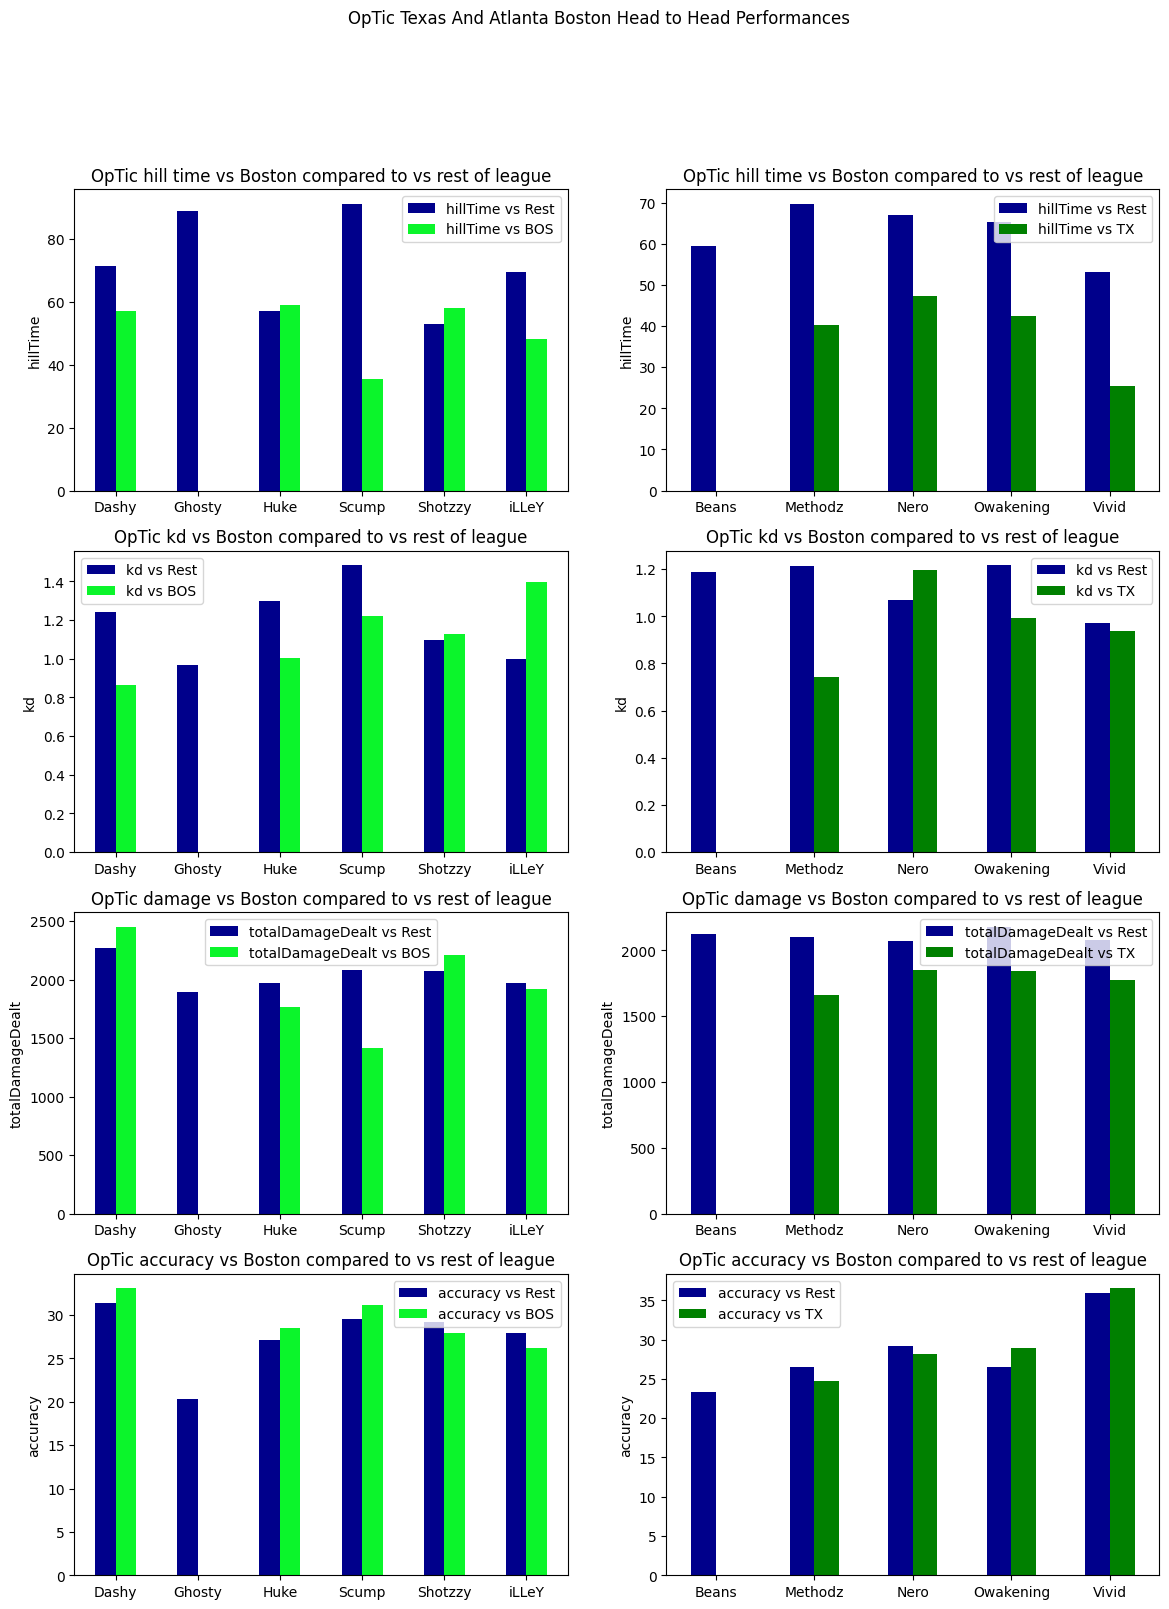

In [42]:
fig = plt.figure(figsize=(14, 18))
((ax1, ax2),
 (ax3, ax4),
 (ax5, ax6),
 (ax7, ax8)) = fig.subplots(ncols=2, nrows=4)

head_to_head(df, 'TX', 'BOS', 'hillTime', "OpTic hill time vs Boston compared to vs rest of league", ax1)
head_to_head(df, 'BOS', 'TX', 'hillTime', "OpTic hill time vs Boston compared to vs rest of league", ax2)
head_to_head(df, 'TX', 'BOS', 'kd', "OpTic kd vs Boston compared to vs rest of league",ax3)
head_to_head(df, 'BOS', 'TX', 'kd', "OpTic kd vs Boston compared to vs rest of league",ax4)
head_to_head(df, 'TX', 'BOS', 'totalDamageDealt', "OpTic damage vs Boston compared to vs rest of league",ax5)
head_to_head(df, 'BOS', 'TX', 'totalDamageDealt', "OpTic damage vs Boston compared to vs rest of league",ax6)
head_to_head(df, 'TX', 'BOS', 'accuracy', "OpTic accuracy vs Boston compared to vs rest of league",ax7)
head_to_head(df, 'BOS', 'TX', 'accuracy', "OpTic accuracy vs Boston compared to vs rest of league",ax8)

fig.suptitle("OpTic Texas And Atlanta Boston Head to Head Performances");

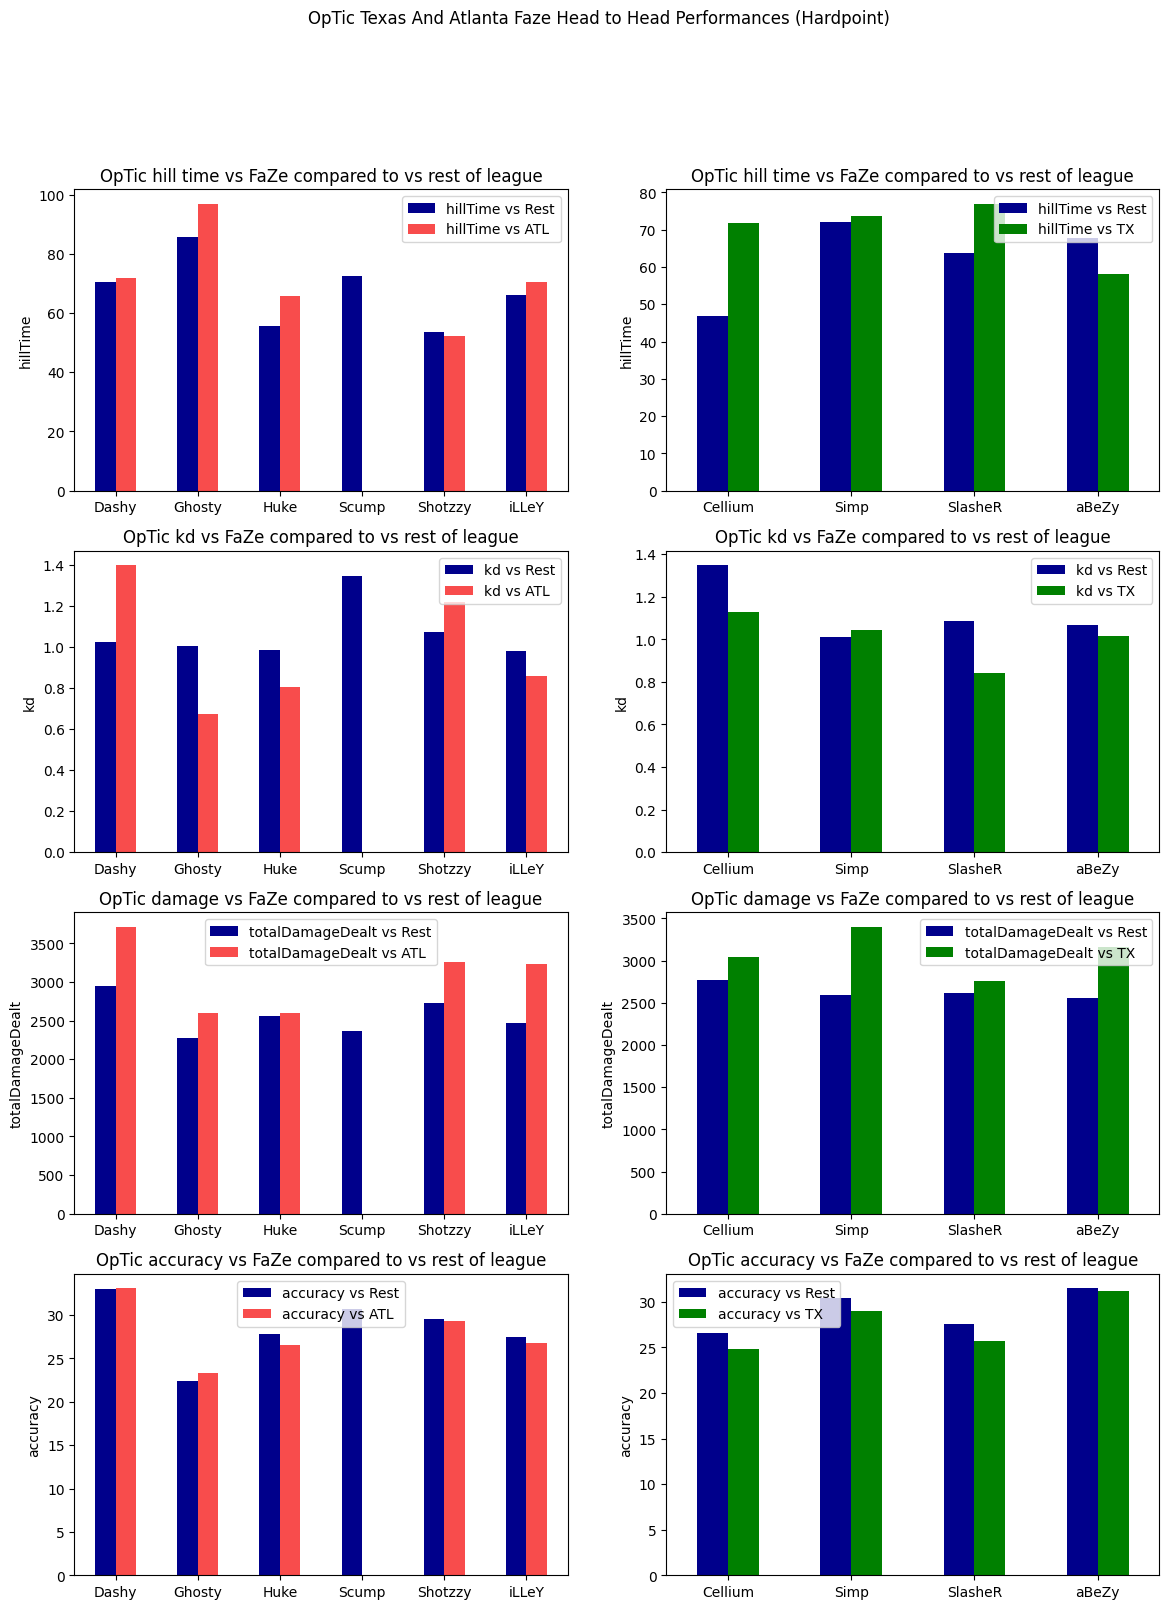

In [43]:
fig = plt.figure(figsize=(14, 18))
((ax1, ax2),
 (ax3, ax4),
 (ax5, ax6),
 (ax7, ax8)) = fig.subplots(ncols=2, nrows=4)

head_to_head(df, 'TX', 'ATL', 'hillTime', "OpTic hill time vs FaZe compared to vs rest of league", ax1, gamemode='CDL Hardpoint')
head_to_head(df, 'ATL', 'TX', 'hillTime', "OpTic hill time vs FaZe compared to vs rest of league", ax2, gamemode='CDL Hardpoint')
head_to_head(df, 'TX', 'ATL', 'kd', "OpTic kd vs FaZe compared to vs rest of league",ax3, gamemode='CDL Hardpoint')
head_to_head(df, 'ATL', 'TX', 'kd', "OpTic kd vs FaZe compared to vs rest of league",ax4, gamemode='CDL Hardpoint')
head_to_head(df, 'TX', 'ATL', 'totalDamageDealt', "OpTic damage vs FaZe compared to vs rest of league",ax5, gamemode='CDL Hardpoint')
head_to_head(df, 'ATL', 'TX', 'totalDamageDealt', "OpTic damage vs FaZe compared to vs rest of league",ax6, gamemode='CDL Hardpoint')
head_to_head(df, 'TX', 'ATL', 'accuracy', "OpTic accuracy vs FaZe compared to vs rest of league",ax7, gamemode='CDL Hardpoint')
head_to_head(df, 'ATL', 'TX', 'accuracy', "OpTic accuracy vs FaZe compared to vs rest of league",ax8, gamemode='CDL Hardpoint')

fig.suptitle("OpTic Texas And Atlanta Faze Head to Head Performances (Hardpoint)");

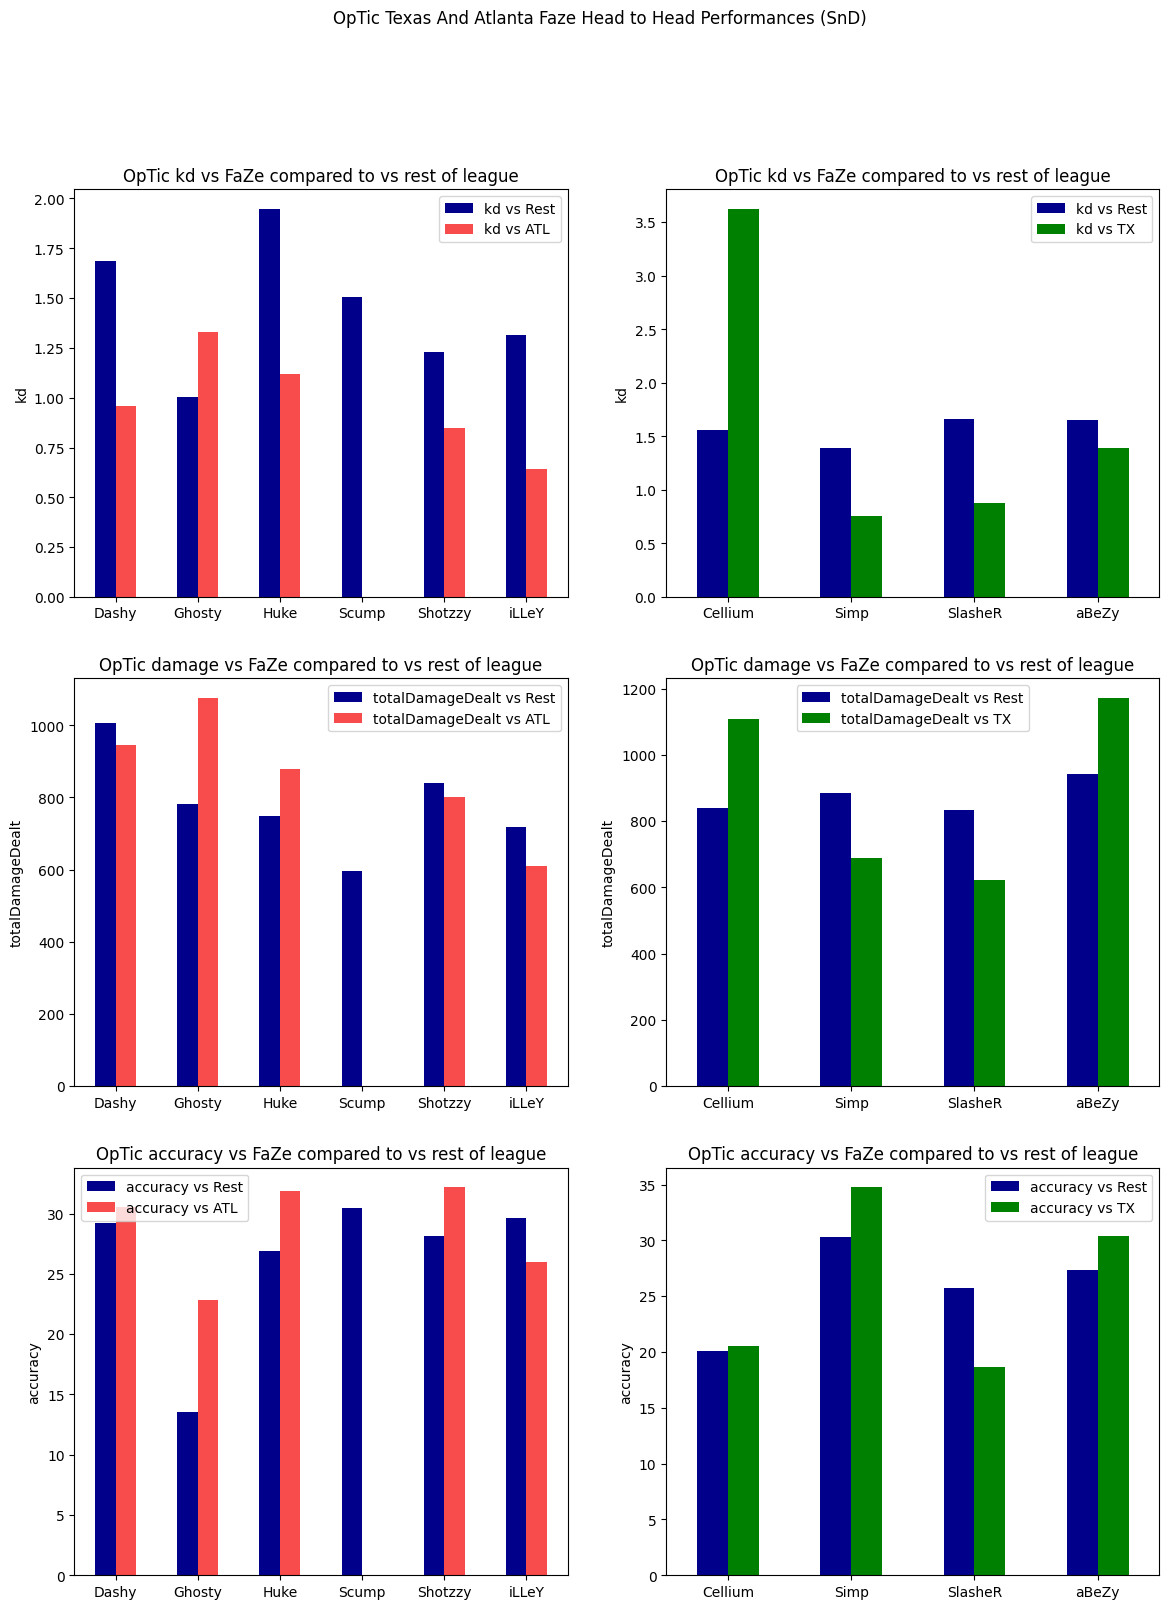

In [49]:
fig = plt.figure(figsize=(14, 18))
((ax3, ax4),
 (ax5, ax6),
 (ax7, ax8)) = fig.subplots(ncols=2, nrows=3)

head_to_head(df, 'TX', 'ATL', 'kd', "OpTic kd vs FaZe compared to vs rest of league",ax3, gamemode='CDL SnD')
head_to_head(df, 'ATL', 'TX', 'kd', "OpTic kd vs FaZe compared to vs rest of league",ax4, gamemode='CDL SnD')
head_to_head(df, 'TX', 'ATL', 'totalDamageDealt', "OpTic damage vs FaZe compared to vs rest of league",ax5, gamemode='CDL SnD')
head_to_head(df, 'ATL', 'TX', 'totalDamageDealt', "OpTic damage vs FaZe compared to vs rest of league",ax6, gamemode='CDL SnD')
head_to_head(df, 'TX', 'ATL', 'accuracy', "OpTic accuracy vs FaZe compared to vs rest of league",ax7, gamemode='CDL SnD')
head_to_head(df, 'ATL', 'TX', 'accuracy', "OpTic accuracy vs FaZe compared to vs rest of league",ax8, gamemode='CDL SnD')

fig.suptitle("OpTic Texas And Atlanta Faze Head to Head Performances (SnD)");

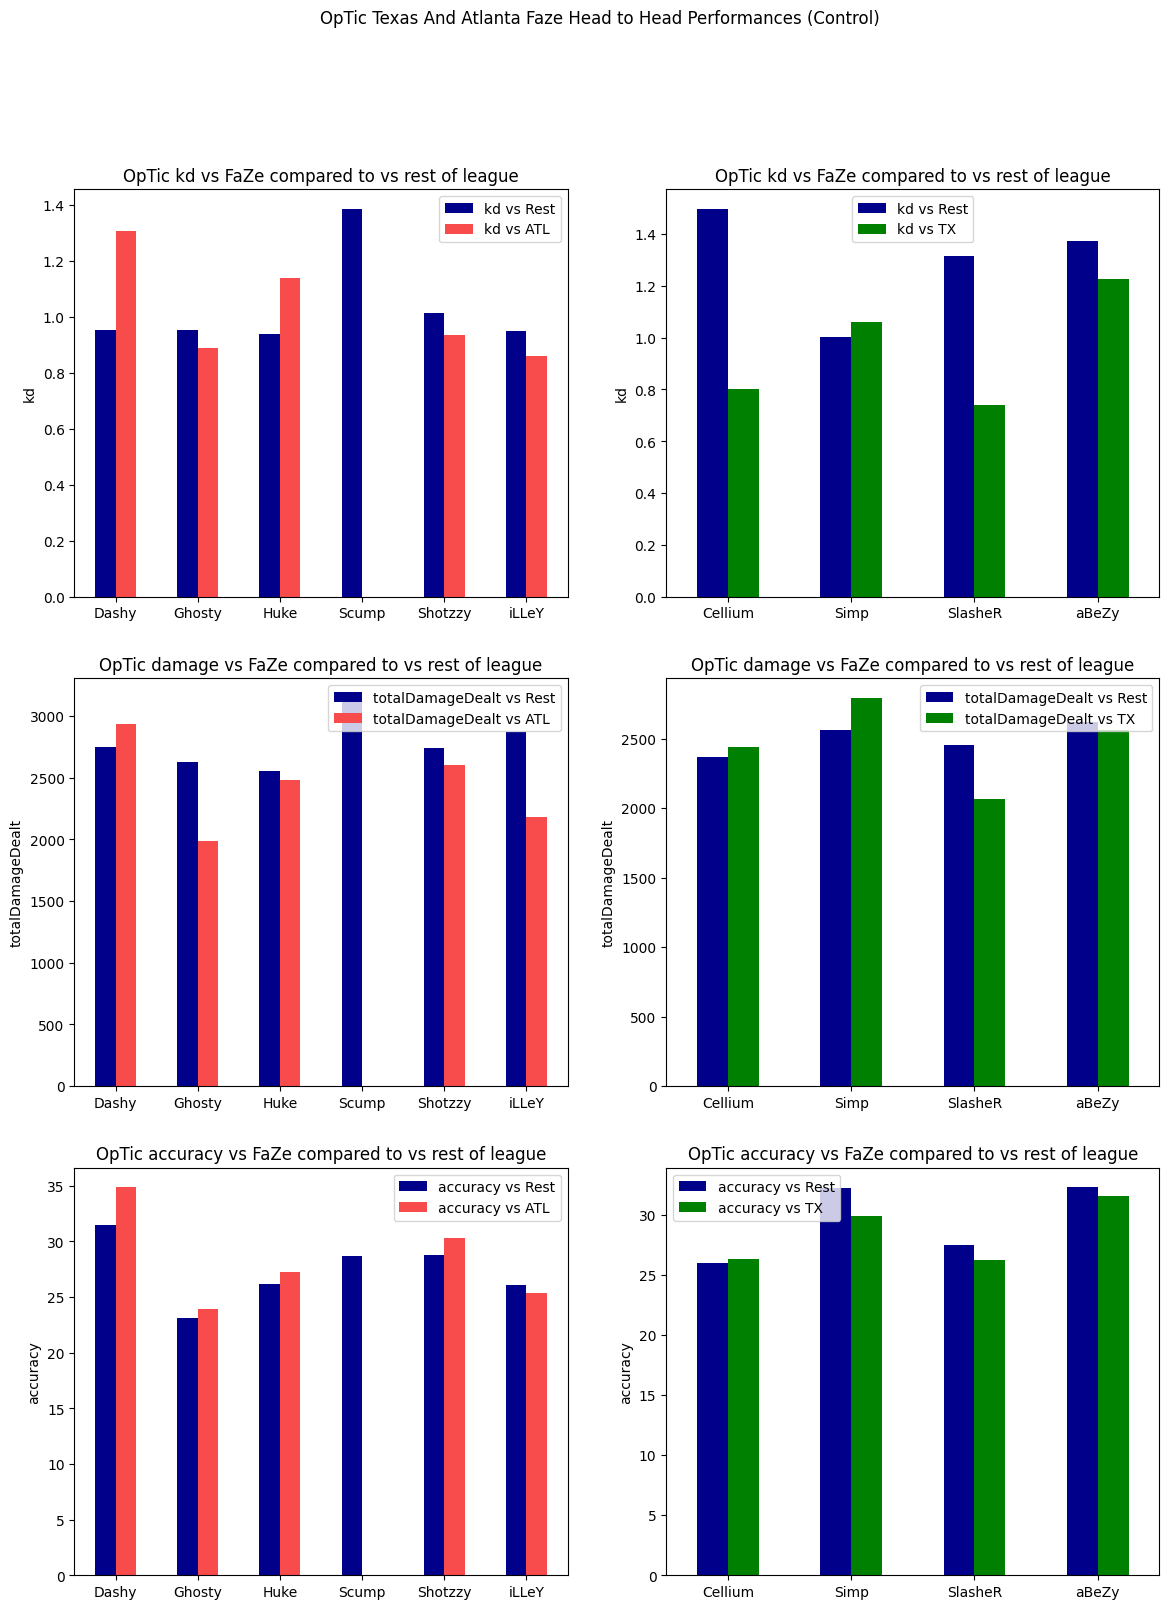

In [48]:
fig = plt.figure(figsize=(14, 18))
((ax3, ax4),
 (ax5, ax6),
 (ax7, ax8)) = fig.subplots(ncols=2, nrows=3)

head_to_head(df, 'TX', 'ATL', 'kd', "OpTic kd vs FaZe compared to vs rest of league",ax3, gamemode='CDL Control')
head_to_head(df, 'ATL', 'TX', 'kd', "OpTic kd vs FaZe compared to vs rest of league",ax4, gamemode='CDL Control')
head_to_head(df, 'TX', 'ATL', 'totalDamageDealt', "OpTic damage vs FaZe compared to vs rest of league",ax5, gamemode='CDL Control')
head_to_head(df, 'ATL', 'TX', 'totalDamageDealt', "OpTic damage vs FaZe compared to vs rest of league",ax6, gamemode='CDL Control')
head_to_head(df, 'TX', 'ATL', 'accuracy', "OpTic accuracy vs FaZe compared to vs rest of league",ax7, gamemode='CDL Control')
head_to_head(df, 'ATL', 'TX', 'accuracy', "OpTic accuracy vs FaZe compared to vs rest of league",ax8, gamemode='CDL Control')

fig.suptitle("OpTic Texas And Atlanta Faze Head to Head Performances (Control)");